In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"C:\Users\user\Downloads\store sales\Superstore.xlsx")

In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.drop(['Row ID','Country'],axis=1,inplace=True)

In [6]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Postal Code    9994 non-null   int64         
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

In [8]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

•##############	Total Sales, Profit, Quantity  ##################

In [9]:
df['Sales'].sum().round()

2297201.0

In [10]:
df['Profit'].sum().round()

286397.0

In [11]:
df['Quantity'].sum().round()

37873

•################	Sales trends over time (daily, monthly, yearly)    ####################

In [12]:
df['month']=df['Order Date'].dt.month

In [13]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11


In [14]:
monthly_sales=df.groupby('month')['Sales'].sum()

In [15]:
monthly_sales

month
1      95365.9376
2      60172.6494
3     199252.9840
4     141851.5674
5     156122.2867
6     147082.6113
7     149580.8380
8     159589.4510
9     309770.0997
10    197115.2017
11    349120.0740
12    332177.1595
Name: Sales, dtype: float64

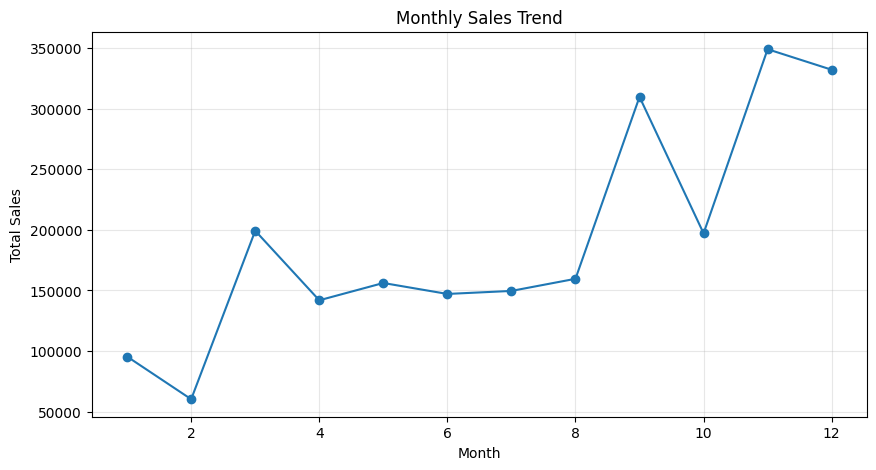

In [16]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(alpha=0.3)
plt.show()


•#################	Profit trends   #################

In [17]:
monthly_profit=df.groupby('month')['Profit'].sum().round()

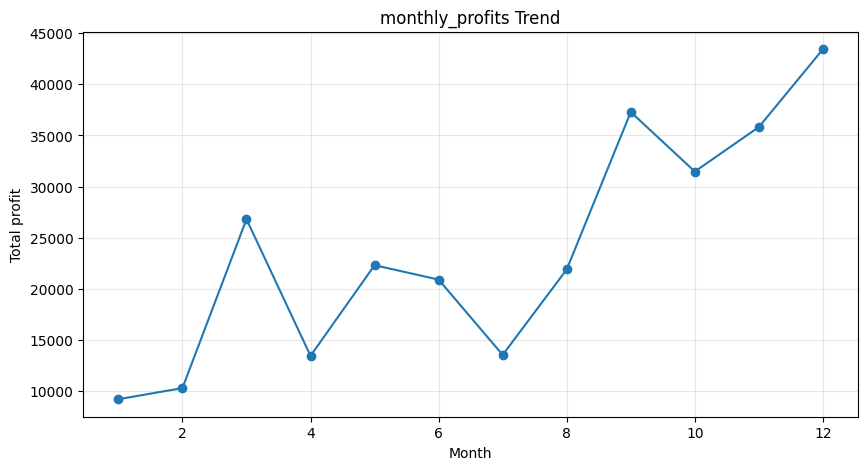

In [18]:
plt.figure(figsize=(10,5))
plt.plot(monthly_profit.index, monthly_profit.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total profit')
plt.title('monthly_profits Trend')
plt.grid(alpha=0.3)
plt.show()

•###################	Profit margin analysis   ########################

In [19]:
Net_Margin=(df['Profit'].sum().round()/df['Sales'].sum().round())*100.

In [20]:
Net_Margin.round(2)

12.47

In [21]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11


•#################	Sales by Customer Name   ####################

In [22]:
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

Customer Name
Sean Miller        25043.050
Tamara Chand       19052.218
Raymond Buch       15117.339
Tom Ashbrook       14595.620
Adrian Barton      14473.571
                     ...    
Roy Skaria            22.328
Mitch Gastineau       16.739
Carl Jackson          16.520
Lela Donovan           5.304
Thais Sissman          4.833
Name: Sales, Length: 793, dtype: float64

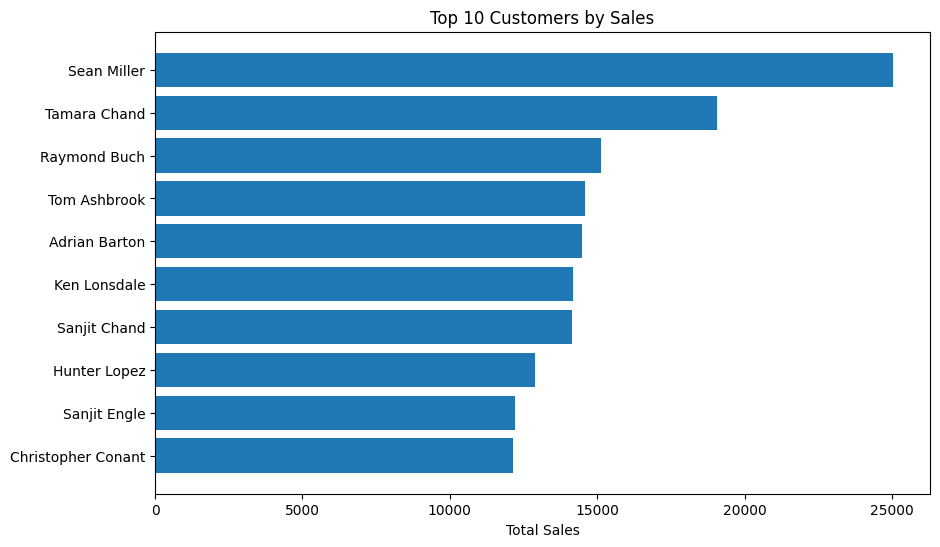

In [23]:
top_customers = (
    df.groupby('Customer Name')['Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)   # top 10 customers
)

plt.figure(figsize=(10,6))
plt.barh(top_customers.index, top_customers.values)
plt.xlabel('Total Sales')
plt.title('Top 10 Customers by Sales')
plt.gca().invert_yaxis()
plt.show()


•#################	Sales by Customer Segment (Consumer, Corporate, Home Office)   ####################

In [24]:
df.groupby('Segment')['Sales'].sum().sort_values(ascending=False).round()

Segment
Consumer       1161401.0
Corporate       706146.0
Home Office     429653.0
Name: Sales, dtype: float64

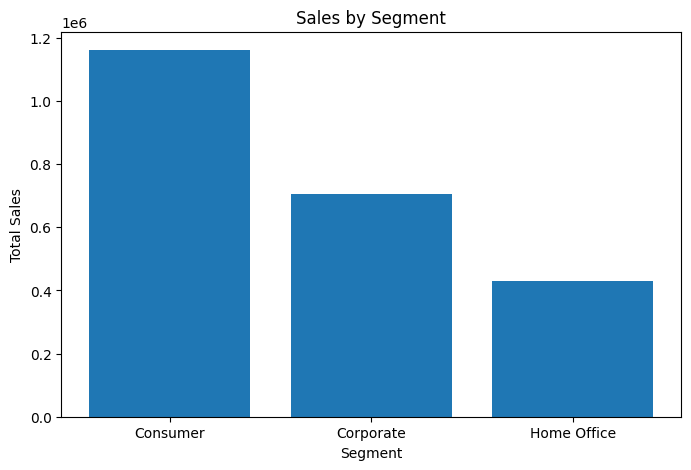

In [25]:
segment_sales = (
    df.groupby('Segment')['Sales']
      .sum()
      .sort_values(ascending=False)
      .round()
)

plt.figure(figsize=(8,5))
plt.bar(segment_sales.index, segment_sales.values)
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Sales by Segment')
plt.show()


•################	Repeat customers vs one-time customers    #####################

In [26]:
customer_orders = df.groupby('Customer ID')['Order ID'].nunique()
df['Customer Type'] = df['Customer ID'].map(
    lambda x: 'Repeat' if customer_orders[x] > 1 else 'One-Time'
)

In [27]:
customer_orders

Customer ID
AA-10315     5
AA-10375     9
AA-10480     4
AA-10645     6
AB-10015     3
            ..
XP-21865    11
YC-21895     5
YS-21880     8
ZC-21910    13
ZD-21925     5
Name: Order ID, Length: 793, dtype: int64

In [28]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,Customer Type
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,Repeat
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,Repeat


In [29]:
df['Customer Type'].value_counts()

Customer Type
Repeat      9967
One-Time      27
Name: count, dtype: int64

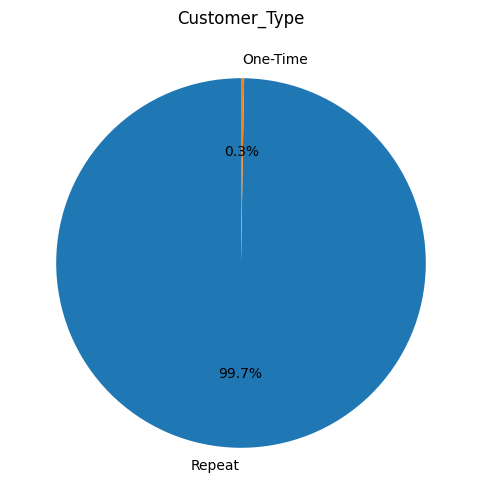

In [30]:
Customer_Type=df['Customer Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    Customer_Type.values,
    labels=Customer_Type.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Customer_Type')
plt.show()


########################   Customer Segment  ################

In [31]:
customer_sales = df.groupby('Customer ID')['Sales'].sum()

threshold = customer_sales.quantile(0.80)

df['Customer Segment'] = df['Customer ID'].map(lambda x: 'High Value' if customer_sales[x] >= threshold else 'Regular')


In [32]:
customer_sales

Customer ID
AA-10315    5563.560
AA-10375    1056.390
AA-10480    1790.512
AA-10645    5086.935
AB-10015     886.156
              ...   
XP-21865    2374.658
YC-21895    5454.350
YS-21880    6720.444
ZC-21910    8025.707
ZD-21925    1493.944
Name: Sales, Length: 793, dtype: float64

In [33]:
threshold

4282.634400000001

In [34]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,Customer Type,Customer Segment
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,Repeat,Regular
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,Repeat,Regular


In [35]:
df['Customer Segment'].value_counts()

Customer Segment
Regular       7097
High Value    2897
Name: count, dtype: int64

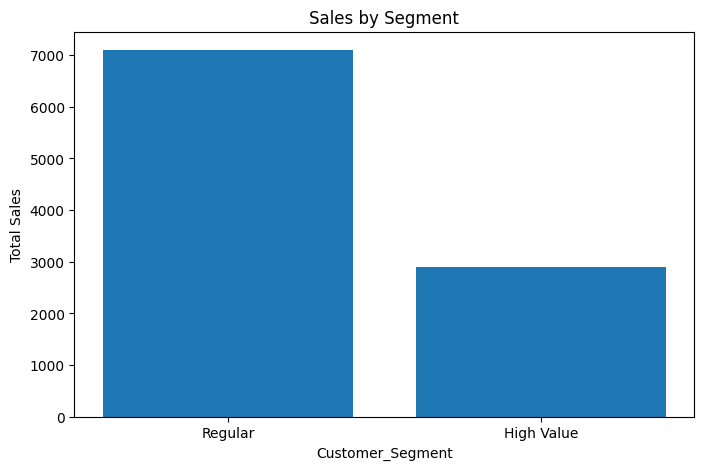

In [36]:
Customer_Segment=df['Customer Segment'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(Customer_Segment.index, Customer_Segment.values)
plt.xlabel('Customer_Segment')
plt.ylabel('Total Sales')
plt.title('Sales by Segment')
plt.show()

•##################	Sales by City  ######################

In [37]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False).round().head(12)

City
New York City    256368.0
Los Angeles      175851.0
Seattle          119541.0
San Francisco    112669.0
Philadelphia     109077.0
Houston           64505.0
Chicago           48540.0
San Diego         47521.0
Jacksonville      44713.0
Springfield       43054.0
Detroit           42447.0
Columbus          38706.0
Name: Sales, dtype: float64

####################	Sales by State   ##################

In [38]:
df.groupby('State')['Sales'].sum().sort_values(ascending=False).round().head(12)

State
California        457688.0
New York          310876.0
Texas             170188.0
Washington        138641.0
Pennsylvania      116512.0
Florida            89474.0
Illinois           80166.0
Ohio               78258.0
Michigan           76270.0
Virginia           70637.0
North Carolina     55603.0
Indiana            53555.0
Name: Sales, dtype: float64

•	Sales by Region

In [39]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'month', 'Customer Type',
       'Customer Segment'],
      dtype='object')

In [40]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False).round().head(12)

Region
West       725458.0
East       678781.0
Central    501240.0
South      391722.0
Name: Sales, dtype: float64

•###################	Hotspot regions and low-performing regions   ######################

In [41]:
region_summary = df.groupby('Region').agg(
    Sales=('Sales', 'sum'),
    Profit=('Profit', 'sum'),
    Orders=('Order ID', 'nunique'),
    Discount=('Discount', 'mean')
)

In [42]:
region_summary

,Sales,Profit,Orders,Discount
Region,,,,
Central,501239.8908,39706.3625,1175,0.240353
East,678781.2400,91522.7800,1401,0.145365
South,391721.9050,46749.4303,822,0.147253
West,725457.8245,108418.4489,1611,0.109335


In [43]:
region_summary['Profit Margin'] = (
    region_summary['Profit'] / region_summary['Sales']
)

In [44]:
region_summary

,Sales,Profit,Orders,Discount,Profit Margin
Region,,,,,
Central,501239.8908,39706.3625,1175,0.240353,0.079216
East,678781.2400,91522.7800,1401,0.145365,0.134834
South,391721.9050,46749.4303,822,0.147253,0.119343
West,725457.8245,108418.4489,1611,0.109335,0.149448


In [88]:
region_summary['Performance'] = region_summary.apply(
    lambda x: 'Hotspot' if x.Sales > 500000 and x['Profit Margin'] > 0.14
    else 'Low Performing' if x.Sales < 200000 and x['Profit Margin'] < 0.08
    else 'Average',
    axis=1
)

In [89]:
region_summary

,Sales,Profit,Orders,Discount,Profit Margin,Performance
Region,,,,,,
Central,501239.8908,39706.3625,1175,0.240353,0.079216,Average
East,678781.2400,91522.7800,1401,0.145365,0.134834,Average
South,391721.9050,46749.4303,822,0.147253,0.119343,Average
West,725457.8245,108418.4489,1611,0.109335,0.149448,Hotspot


In [90]:
region_summary['Performance']

Region
Central    Average
East       Average
South      Average
West       Hotspot
Name: Performance, dtype: object

###################	Average shipping time (Ship Date – Order Date)  #####################

In [47]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,Customer Type,Customer Segment
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,Repeat,Regular
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,Repeat,Regular


In [48]:
df['Shipping Days']=(df['Ship Date'] - df['Order Date']).dt.days

In [49]:
avg_shipping_time = df['Shipping Days'].mean()

In [50]:
avg_shipping_time.round(2)

3.96

###################	Sales by Ship Mode (Standard/Second Class/First Class/Same Day)   ##################

In [51]:
df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).round()

Ship Mode
Standard Class    1358216.0
Second Class       459194.0
First Class        351428.0
Same Day           128363.0
Name: Sales, dtype: float64

•	Ship Mode impact on profit

In [52]:
shipmode_profit = df.groupby('Ship Mode').agg(
    Sales=('Sales', 'sum'),
    Profit=('Profit', 'sum'),
    Avg_Shipping_Days=('Shipping Days', 'mean'),
    Orders=('Order ID', 'nunique')
)

In [53]:
shipmode_profit

,Sales,Profit,Avg_Shipping_Days,Orders
Ship Mode,,,,
First Class,3.514284e+05,48969.8399,2.182055,787
Same Day,1.283631e+05,15891.7589,0.044199,264
Second Class,4.591936e+05,57446.6354,3.240103,964
Standard Class,1.358216e+06,164088.7875,5.007205,2994


In [54]:
shipmode_profit['Profit Margin'] = ((shipmode_profit['Profit'] / shipmode_profit['Sales'])*100).round(2)

In [55]:
shipmode_profit

,Sales,Profit,Avg_Shipping_Days,Orders,Profit Margin
Ship Mode,,,,,
First Class,3.514284e+05,48969.8399,2.182055,787,13.93
Same Day,1.283631e+05,15891.7589,0.044199,264,12.38
Second Class,4.591936e+05,57446.6354,3.240103,964,12.51
Standard Class,1.358216e+06,164088.7875,5.007205,2994,12.08


•#################	Best-selling products / •	Worst-selling products   ####################3

In [56]:
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).round().head(12)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61600.0
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.0
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.0
HON 5400 Series Task Chairs for Big and Tall                                   21871.0
GBC DocuBind TL300 Electric Binding System                                     19823.0
GBC Ibimaster 500 Manual ProClick Binding System                               19024.0
Hewlett Packard LaserJet 3310 Copier                                           18840.0
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18375.0
GBC DocuBind P400 Electric Binding System                                      17965.0
High Speed Automatic Electric Letter Opener                                    17030.0
Lexmark MX611dhe Monochrome Laser Printer                                      16830.0
Martin Yale Chadless Opener El

In [57]:
df.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).round().head(12)

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac     2.0
Avery 5                                                              6.0
Xerox 20                                                             6.0
Grip Seal Envelopes                                                  7.0
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                   8.0
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink      8.0
Xerox 1989                                                           8.0
4009 Highlighters                                                    8.0
Stockwell Gold Paper Clips                                           8.0
Newell 308                                                           8.0
Avery 484                                                            9.0
Kleencut Forged Office Shears by Acme United Corporation            10.0
Name: Sales, dtype: float64

•	Product categories and sub-categories performance

In [58]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False).round()

Category
Technology         836154.0
Furniture          742000.0
Office Supplies    719047.0
Name: Sales, dtype: float64

In [59]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).round()

Sub-Category
Phones         330007.0
Chairs         328449.0
Storage        223844.0
Tables         206966.0
Binders        203413.0
Machines       189239.0
Accessories    167380.0
Copiers        149528.0
Bookcases      114880.0
Appliances     107532.0
Furnishings     91705.0
Paper           78479.0
Supplies        46674.0
Art             27119.0
Envelopes       16476.0
Labels          12486.0
Fasteners        3024.0
Name: Sales, dtype: float64

•#####################	Product-level profitability   ########################

In [60]:
product_perf = df.groupby('Product Name').agg(
    Sales=('Sales', 'sum'),
    Profit=('Profit', 'sum'),
    Quantity=('Quantity', 'sum'),
    Avg_Discount=('Discount', 'mean')
)

In [61]:
product_perf['Profit Margin'] = ((
    product_perf['Profit'] / product_perf['Sales']
)*100).round(2)

In [62]:
product_perf.sort_values(by='Profit',ascending=False).head(10)

,Sales,Profit,Quantity,Avg_Discount,Profit Margin
Product Name,,,,,
Canon imageCLASS 2200 Advanced Copier,61599.824,25199.9280,20,0.120000,40.91
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,7753.0390,31,0.240000,28.24
Hewlett Packard LaserJet 3310 Copier,18839.686,6983.8836,38,0.200000,37.07
Canon PC1060 Personal Laser Copier,11619.834,4570.9347,19,0.150000,39.34
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895,4094.9766,12,0.166667,22.29
Ativa V4110MDD Micro-Cut Shredder,7699.890,3772.9461,11,0.000000,49.00
"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,3717.9714,11,0.000000,26.00
Plantronics Savi W720 Multi-Device Wireless Headset System,9367.290,3696.2820,24,0.057143,39.46
Ibico EPK-21 Electric Binding System,15875.916,3345.2823,13,0.333333,21.07


•####################	Products with negative profit    ####################

In [63]:
loss_products = (
    df.groupby('Product Name')
      .agg(Sales=('Sales','sum'),Profit=('Profit','sum'))
)  

In [64]:
loss_products = loss_products[loss_products['Profit'] < 0] \
                    .sort_values('Profit')


In [65]:
loss_products

,Sales,Profit
Product Name,,
Cubify CubeX 3D Printer Double Head Print,11099.963,-8.879970e+03
Lexmark MX611dhe Monochrome Laser Printer,16829.901,-4.589973e+03
Cubify CubeX 3D Printer Triple Head Print,7999.980,-3.839990e+03
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,9917.640,-2.876116e+03
Bush Advantage Collection Racetrack Conference Table,9544.725,-1.934398e+03
...,...,...
"Brites Rubber Bands, 1 1/2 oz. Box",13.068,-5.148000e-01
Rubber Band Ball,58.344,-2.992000e-01
"Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 9 1/2"" X 11""",62.946,-1.614000e-01


In [66]:
product_perf[product_perf['Profit Margin']<0].sort_values(by='Profit Margin',ascending=False).head(10)

,Sales,Profit,Quantity,Avg_Discount,Profit Margin
Product Name,,,,,
Carina Double Wide Media Storage Towers in Natural & Black,3028.652,-3.2392,39,0.066667,-0.11
Eldon Gobal File Keepers,348.220,-0.6056,24,0.066667,-0.17
"Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 9 1/2"" X 11""",62.946,-0.1614,23,0.550000,-0.26
Tennsco Regal Shelving Units,1764.534,-6.0846,18,0.050000,-0.34
Rubber Band Ball,58.344,-0.2992,16,0.050000,-0.51
"Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table",2298.114,-12.1329,39,0.177778,-0.53
"Sauder Facets Collection Library, Sky Alder Finish",1427.683,-8.5490,10,0.150000,-0.60
"Avery Framed View Binder, EZD Ring (Locking), Navy, 1 1/2""",99.800,-0.6986,19,0.450000,-0.70
"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelves, 24"" Deep, Sand",4384.044,-36.5337,33,0.028571,-0.83


•#################	Sales gained due to discounts ???? ###################

In [67]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,Customer Type,Customer Segment,Shipping Days
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,Repeat,Regular,3
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,Repeat,Regular,3


In [68]:
discounted=df[df['Discount']>0]['Sales'].sum().round()

In [69]:
discounted

1209292.0

In [70]:
not_discounted=df[df['Discount'] == 0]['Sales'].sum().round()

In [71]:
not_discounted

1087908.0

In [72]:
sales_uplift = ((discounted - not_discounted) / not_discounted).round(2)

In [73]:
sales_uplift

0.11

•###################	Are discounts harming profit?     #################################################

In [74]:
df['Discount Band'] = pd.cut( df['Discount'],bins=[0, 0.1, 0.2, 0.3, 1],labels=['0–10%','10–20%','20–30%','>30%'])

In [75]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,month,Customer Type,Customer Segment,Shipping Days,Discount Band
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,Repeat,Regular,3,NaN
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,Repeat,Regular,3,NaN


In [76]:
discount_profit = df.groupby('Discount Band').agg(
    Sales=('Sales','sum'),
    Profit=('Profit','sum')
)

C:\Users\user\AppData\Local\Temp\ipykernel_14600\2526717232.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_profit = df.groupby('Discount Band').agg(


In [77]:
discount_profit

,Sales,Profit
Discount Band,,
0–10%,54369.3510,9029.1770
10–20%,792152.8895,91756.2975
20–30%,103226.6550,-10369.2774
>30%,259543.4948,-125006.7786


In [78]:
discount_profit['Profit Margin'] = ((
    discount_profit['Profit'] / discount_profit['Sales']
)).round(2)

In [79]:
discount_profit

,Sales,Profit,Profit Margin
Discount Band,,,
0–10%,54369.3510,9029.1770,0.17
10–20%,792152.8895,91756.2975,0.12
20–30%,103226.6550,-10369.2774,-0.10
>30%,259543.4948,-125006.7786,-0.48


•########################	Identify products where discount is unnecessary   #####################

In [80]:
product_summary = df.groupby('Product Name').agg(
    Sales=('Sales','sum'),
    Profit=('Profit','sum'),
    No_Discount_Sales=('Sales', lambda x: x[df.loc[x.index,'Discount'] == 0].sum())
)

product_summary['Profit Margin'] = (
    product_summary['Profit'] / product_summary['Sales']
)

product_summary['No_Discount_Sales %'] = (
    product_summary['No_Discount_Sales'] / product_summary['Sales']
)

unnecessary_discount_products = product_summary[
    (product_summary['Profit Margin'] >= 0.20) &
    (product_summary['No_Discount_Sales %'] >= 0.70)
]




In [81]:
unnecessary_discount_products

,Sales,Profit,No_Discount_Sales,Profit Margin,No_Discount_Sales %
Product Name,,,,,
#10 Self-Seal White Envelopes,108.682,52.1230,99.81,0.479592,0.918367
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,223.1408,438.76,0.456410,0.897436
"1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",49.980,22.7115,44.10,0.454412,0.882353
"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,3717.9714,14299.89,0.260000,1.000000
3M Office Air Cleaner,259.800,90.9300,259.80,0.350000,1.000000
...,...,...,...,...,...
Xerox Blank Computer Paper,99.900,46.9530,99.90,0.470000,1.000000
"Xerox Color Copier Paper, 11"" x 17"", Ream",593.840,260.8328,502.48,0.439231,0.846154
Xiaomi Mi3,2279.960,592.7896,2279.96,0.260000,1.000000


•#################	Order-wise sales  #####################

In [82]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,month,Customer Type,Customer Segment,Shipping Days,Discount Band
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,Repeat,Regular,3,NaN
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,Repeat,Regular,3,NaN


In [83]:
order_summary = df.groupby('Order ID').agg(
    Order_Sales=('Sales','sum'),
    Order_Profit=('Profit','sum'),
    Avg_Discount=('Discount','mean'),
    Items=('Quantity','sum')
)

In [84]:
order_summary

,Order_Sales,Order_Profit,Avg_Discount,Items
Order ID,,,,
CA-2011-100006,377.970,109.6113,0.000000,3
CA-2011-100090,699.192,-19.0890,0.200000,9
CA-2011-100293,91.056,31.8696,0.200000,6
CA-2011-100328,3.928,1.3257,0.200000,1
CA-2011-100363,21.376,7.7192,0.200000,5
...,...,...,...,...
US-2014-168802,18.368,5.9696,0.200000,4
US-2014-169320,171.430,16.6721,0.000000,7
US-2014-169488,56.860,26.5552,0.000000,7


In [85]:
order_summary['Profit Margin'] = (
    order_summary['Order_Profit'] / order_summary['Order_Sales']
)

In [86]:
order_summary.sort_values(by='Profit Margin',ascending=False)

,Order_Sales,Order_Profit,Avg_Discount,Items,Profit Margin
Order ID,,,,,
CA-2013-109407,31.360,15.6800,0.0,4,0.500000
CA-2012-162782,2541.980,1270.9900,0.0,2,0.500000
CA-2011-156993,6.080,3.0400,0.0,1,0.500000
CA-2011-156601,7.160,3.5800,0.0,2,0.500000
CA-2014-167668,59.200,29.6000,0.0,4,0.500000
...,...,...,...,...,...
CA-2012-164007,145.504,-392.8595,0.5,5,-2.699991
US-2014-116701,66.284,-178.9668,0.8,2,-2.700000
CA-2014-165099,1.392,-3.7584,0.8,2,-2.700000
